In [314]:
from dataframe_handling import create_df
import numpy as np
# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [2]:
df= create_df()

In [3]:
df.category_name[:10]

0      outdoors/adventure
1         career/business
2                 fitness
3        health/wellbeing
4                    LGBT
5        health/wellbeing
6                   music
7              book clubs
8    new age/spirituality
9         career/business
Name: category_name, dtype: object

In [4]:
df.description[:10]

0    World Traveling photographers is a group for n...
1    Do you work at or with San Francisco Bay Area ...
2    Voted BEST RUNNING CLUB in the Bay AREA Go WOW...
3    What is supportive of a healthy body, mind, he...
4    The purpose ofSan Francisco Walking Dykes grou...
5    Coaches inspire our clients to be the best the...
6    1) Instant Chorus gets you singing a cappella ...
7    Greetings. There is hardly anything I enjoy mo...
8    Explore your true potential through harnessing...
9    What is Fore Us? Fore Us is a loosely based or...
Name: description, dtype: object

In [178]:
df.sponsor_details[2]

[u'San Francisco A List Voted Go WOW Team Best Running Club in the Bay Area',
 u'Stephanie K Atwood Enterprises is the dream business of Founder Stephanie Atwood, offering lifelong fitness to women everywhere through running, walking, and the outdoors. WOW offers all the pieces to all women, all sizes, all shapes, all abilities, to pursue their "athlete within" and discover their true potential. Through neighborhood groups, live support calls, and the 15 minute learning series, you have access to train and grow wherever you live. Join us soon!',
 u'The See Jane Run Half Marathon and 5K are full of chocolate, champagne, and women who can call themselves athletes.',
 u'Train with WOW, get a registration discount for the ORF.',
 nan,
 u"Use the gymboss for many different workouts and times. It's great!"]

In [5]:
additional_stopwords = {'com','www'}

In [199]:
count_vectorizer = CountVectorizer(analyzer='word',
                                  ngram_range=(1, 3), min_df=2,
        stop_words=text.ENGLISH_STOP_WORDS.union(additional_stopwords),
                                  token_pattern='\\b[a-z][a-z]+\\b')

In [200]:
count_vectorizer.fit(df.description.dropna())

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=frozenset(['all', 'show', 'anyway', 'four', 'go', 'mill', 'find', 'seemed', 'whose', 're', 'herself', 'whoever', 'behind', 'should', 'to', 'only', 'under', 'herein', 'do', 'his', 'get', 'very', 'de', 'myself', 'cannot', 'every', 'yourselves', 'him', 'is', 'cry', 'beforehand', 'these', 'sh...ho', 'most', 'eight', 'but', 'nothing', 'why', 'noone', 'sometimes', 'together', 'serious', 'once']),
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [201]:
count_vectorizer.vocabulary_

{u'dance clubs': 17292,
 u'process successful': 67369,
 u'related apache apex': 70902,
 u'vote favorite': 88784,
 u'group dedicated building': 33898,
 u'inevitably': 40856,
 u'physically emotionally': 64537,
 u'today public speaking': 84921,
 u'love create': 50373,
 u'travel club': 85778,
 u'south north': 78444,
 u'need girls night': 57772,
 u'share similar interests': 75960,
 u'fitness goals join': 28471,
 u'think friends': 84040,
 u'specials travel': 78925,
 u'socials hiking': 77952,
 u'groups yahoo': 35456,
 u'teach different': 82744,
 u'buddies starting': 8438,
 u'meet general': 52893,
 u'positive good': 65941,
 u'valued key': 87807,
 u'hang soon': 36112,
 u'books random': 7580,
 u'potential future': 66221,
 u'welcomed': 90777,
 u'case haven noticed': 10095,
 u'activating': 564,
 u'ancient spiritual teaching': 2339,
 u'welcomes': 90783,
 u'fit': 28423,
 u'fix': 28511,
 u'french spanish english': 30291,
 u'fin': 28233,
 u'performed singing artists': 63899,
 u'clara san': 11697,
 u'o

In [202]:
ng_vecs = count_vectorizer.transform(df.description.dropna()).transpose()
vec_sum =ng_vecs.sum(axis=1)

In [203]:
vec_sum.sort()
vec_sum[100:110]

matrix([[2],
        [6],
        [2],
        [2],
        [2],
        [5],
        [2],
        [3],
        [2],
        [2]])

In [204]:
ng_vecs.shape

(93410, 7943)

In [205]:
corpus = matutils.Sparse2Corpus(ng_vecs)

In [206]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.iteritems())

In [207]:
tfidf = models.TfidfModel(corpus)

In [208]:
tfidf_corpus = tfidf[corpus]


In [209]:
lsi = models.LsiModel(tfidf_corpus, id2word=id2word, num_topics=100)

In [210]:
lsi_corpus = lsi[tfidf_corpus]

In [211]:
doc_vecs = [doc for doc in lsi_corpus]


In [212]:
index = similarities.MatrixSimilarity(doc_vecs, num_features=100)

In [213]:
print index[doc_vecs[110]]
print len(index[doc_vecs[110]])
doc_vecs[110][:10]

[ 0.00828001  0.21914864  0.15914033 ..., -0.00950829  0.20157936
  0.03564349]
7943


[(0, 0.10238014778129546),
 (1, -0.046460503089586463),
 (2, 0.024201460974799988),
 (3, 0.022388130825631191),
 (4, -0.037535408160921671),
 (5, -0.025603906624287447),
 (6, -0.062583800753073515),
 (7, 0.0036532228214037907),
 (8, -0.017605225268664548),
 (9, -0.014999637374800123)]

In [218]:
sims = sorted(enumerate(index[doc_vecs[3540]]), key=lambda item: -item[1])

In [219]:
sims

[(3540, 1.0),
 (5, 0.73172283),
 (1755, 0.64875704),
 (1770, 0.63553262),
 (3488, 0.58744144),
 (1543, 0.55479157),
 (1817, 0.54983163),
 (7802, 0.52615589),
 (1030, 0.51783854),
 (1803, 0.51564169),
 (5767, 0.51559061),
 (4110, 0.50970471),
 (1523, 0.50612915),
 (2382, 0.50307274),
 (6911, 0.49966162),
 (6550, 0.49931607),
 (7355, 0.49897668),
 (2000, 0.4977746),
 (4775, 0.49676523),
 (3139, 0.49521059),
 (4308, 0.49492866),
 (933, 0.49163103),
 (4007, 0.47492081),
 (1182, 0.47401732),
 (3988, 0.46911415),
 (6353, 0.46444792),
 (865, 0.462998),
 (5392, 0.46193495),
 (5504, 0.46193495),
 (1045, 0.46042466),
 (5841, 0.45815605),
 (2903, 0.45778999),
 (2661, 0.45711583),
 (3460, 0.45644701),
 (1814, 0.45420697),
 (1634, 0.45238954),
 (5737, 0.45186824),
 (7096, 0.45012715),
 (1851, 0.44977567),
 (5694, 0.44767401),
 (1831, 0.44765958),
 (2547, 0.44514912),
 (6257, 0.44007292),
 (7915, 0.43734357),
 (797, 0.4359585),
 (4523, 0.43474898),
 (5382, 0.43444657),
 (4955, 0.43412617),
 (7566, 0

In [220]:
todas =[]
for sim in sims:
    todas.append(sim[0])


In [221]:
for i in todas: 
    print i,df.category_name[i]

3540 tech
5 health/wellbeing
1755 career/business
1770 career/business
3488 tech
1543 career/business
1817 support
7802 health/wellbeing
1030 health/wellbeing
1803 career/business
5767 support
4110 tech
1523 tech
2382 support
6911 new age/spirituality
6550 tech
7355 book clubs
2000 support
4775 tech
3139 fashion/beauty
4308 fitness
933 tech
4007 education/learning
1182 career/business
3988 education/learning
6353 music
865 support
5392 games
5504 language/ethnic identity
1045 career/business
5841 photography
2903 support
2661 tech
3460 support
1814 career/business
1634 education/learning
5737 LGBT
7096 book clubs
1851 career/business
5694 fitness
1831 career/business
2547 parents/family
6257 tech
7915 tech
797 career/business
4523 language/ethnic identity
5382 health/wellbeing
4955 tech
7566 tech
3410 new age/spirituality
2672 career/business
66 socializing
7928 new age/spirituality
2421 career/business
6281 tech
1412 health/wellbeing
4784 tech
6872 tech
5748 book clubs
6652 singles
23

In [62]:
df.category_name[456]

u'tech'

## Checking For Metis

In [260]:
texto=['Metis accelerates the careers of data scientists by providing full-time immersive bootcamps,\
evening professional development courses, online training and corporate programs.Train you to think and act like a data scientist.\
Teach you the most essential skills and technologies. Immerse you in real-world, complex problems.Create opportunities to connect with prospective employers.\
Provide you with excellent student support.Inject continual fun, passion, and excitement into your experience at Metis.',
      'big data startups']

texto_galvanize=['Galvanize is where you can become a developer, data scientist, data engineer, or build your tech startup.']

In [241]:
#len(texto.split(' '))

In [261]:
np.array(texto)

array([ 'Metis accelerates the careers of data scientists by providing full-time immersive bootcamps,evening professional development courses, online training and corporate programs.Train you to think and act like a data scientist.Teach you the most essential skills and technologies. Immerse you in real-world, complex problems.Create opportunities to connect with prospective employers.Provide you with excellent student support.Inject continual fun, passion, and excitement into your experience at Metis.',
       'big data startups'], 
      dtype='|S498')

In [262]:
#metis_counts = count_vectorizer.fit(texto)
metis_vecs = count_vectorizer.transform(np.array(texto)).transpose()

In [263]:
print type(metis_vecs)
print metis_vecs.shape


<class 'scipy.sparse.csc.csc_matrix'>
(93410, 2)


In [264]:
metis_corpus= matutils.Sparse2Corpus(metis_vecs)

In [265]:
count = 0 
while count<1:
    for i in metis_corpus:
        print i
        count+=1

[(221, 1), (510, 1), (516, 1), (7633, 1), (9997, 1), (14260, 1), (14262, 1), (14587, 1), (15312, 1), (15681, 1), (15986, 1), (16142, 1), (16284, 1), (17489, 2), (17580, 1), (17581, 1), (19134, 1), (22705, 1), (24204, 1), (24415, 1), (25502, 1), (25607, 1), (25933, 1), (30803, 1), (39875, 1), (39879, 1), (41182, 1), (48022, 1), (48090, 1), (60264, 1), (60649, 1), (62689, 1), (62697, 1), (67290, 1), (67584, 1), (67613, 1), (68046, 1), (68420, 1), (68495, 1), (68706, 1), (70003, 1), (70118, 1), (74305, 1), (74309, 1), (77189, 1), (80869, 1), (81542, 1), (82731, 1), (83189, 1), (84024, 1), (84314, 1), (85524, 1), (85555, 1), (92425, 1)]
[(6793, 1), (6800, 1), (17489, 1), (80008, 1)]


In [266]:
metis_tfidf_corpus = tfidf[metis_corpus]

In [267]:
metis_lsi_corpus = lsi[metis_tfidf_corpus]

In [268]:
metis_doc_vecs = [doc for doc in metis_lsi_corpus]

In [282]:
#metis_index = similarities.MatrixSimilarity(metis_doc_vecs, num_features=100)

In [298]:
#sims = sorted(enumerate(index[metis_doc_vecs[0]]), key=lambda item: -item[1])
index.num_best=3000
my_index=index[metis_doc_vecs[0]]

In [302]:
doc_lengths=[]
for i in my_index:
    try:
        doc = df.description[i[0]].split(' ')
        doc_lengths.append(len(doc))
    except AttributeError:
        continue



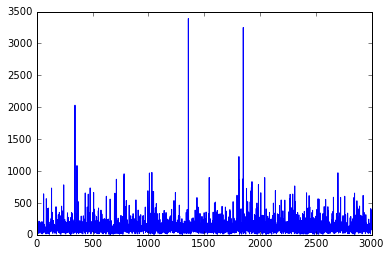

In [309]:
plt.plot(doc_lengths)

In [311]:
_indices=[]
for i in my_index: 
    _indices.append(df.description[i[0]])
    print i,df.category_name[i[0]]
    

(6300, 0.80770212411880493) tech
(6898, 0.80502873659133911) career/business
(5437, 0.79019409418106079) tech
(7602, 0.78923964500427246) health/wellbeing
(1255, 0.78411346673965454) tech
(6752, 0.77843260765075684) games
(5264, 0.77337038516998291) sports/recreation
(7189, 0.77247309684753418) support
(4737, 0.77036863565444946) tech
(859, 0.76731139421463013) tech
(5640, 0.76574349403381348) health/wellbeing
(1227, 0.76552867889404297) tech
(2138, 0.76448768377304077) tech
(306, 0.75955694913864136) tech
(5656, 0.75914454460144043) sports/recreation
(2335, 0.75830715894699097) tech
(6864, 0.75439077615737915) career/business
(4945, 0.75298410654067993) language/ethnic identity
(2966, 0.75105124711990356) tech
(6151, 0.75014781951904297) religion/beliefs
(1934, 0.74975687265396118) tech
(7207, 0.74958670139312744) tech
(1063, 0.74900859594345093) tech
(4866, 0.74628603458404541) fitness
(2282, 0.7461315393447876) tech
(1908, 0.74523347616195679) tech
(5404, 0.74185091257095337) suppor

In [301]:
df.description.describe()

count                                                  7943
unique                                                 7895
top       Hi there! Welcomeand glad that you found your ...
freq                                                      7
Name: description, dtype: object

In [315]:
top_docs=pd.Series(_indices)

In [316]:
top_docs.shape

(3000,)

In [317]:
top_docs.dropna().shape

(2998,)

In [319]:
top_docs[top_docs.isnull()]

1374    NaN
2934    NaN
dtype: object

In [344]:
top_docs[19]

u"What do we do? ZANG TALK is a nonprofit organization that produces events of short and dynamic lectures, with 4 different successful speakers from the Jewish community in 4 completely different domains. ZANG TALK gives useful tools for the audience in diverse domains. How do we do it? Each speaker will give a short talk, roughly 10-15 minutes, about his or her professional lifework. The speakers will be the world's brilliant thinkers, greatest visionaries and most inspiring people from the local Israeli and Jewish community in the Silicon Valley."